# In this notebook, we're going to do a fundamentals of tensor flow

More specifically, we're going to cover :
* Intro to to tensors
* Getting Information from tensors
* Manipulating tensors
* Tensors and Numpy
* Using tf.function
* Using GPU with TensorFlow
* Exercise

## Introduction to tensors

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dim of a tensor
scalar.ndim

0

In [4]:
# Create a vector 
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [5]:
# Check the dim of vector
vector.ndim

1

In [6]:
# Create a matrix
matrix =  tf.constant([[10,5],[5,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  5],
       [ 5, 10]])>

In [7]:
matrix.ndim

2

In [8]:
#Create another matrix
matrix_2 = tf.constant([[10., 7.],[3., 2.],[4.5, 8.]], dtype=tf.float16)
matrix_2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10. ,  7. ],
       [ 3. ,  2. ],
       [ 4.5,  8. ]], dtype=float16)>

In [9]:
matrix.ndim

2

In [10]:
# Create a tensor
tensor = tf.constant([[[1, 2, 3],
                      [4, 5, 6]],
                     [[7, 8, 9],
                     [10, 11, 12]],
                     [[13, 14, 15],
                     [16, 27, 28]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 27, 28]]])>

In [11]:
tensor.ndim

3

What we've created so far :
* Scalar : a single number
* Vector : a number with direction
* Matrix : a 2-dimensional array of numbers
* Tensor : an n-dimensional array of numbers

### Creating tensors with `tf.variable`

In [12]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [13]:
#create tensor with tf.Variable
var = tf.Variable([10, 7]) #Mutable
const = tf.constant([10, 7]) #Immutable
var, const

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [14]:
#Change the element in var
var[0]

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [15]:
var[0].assign(7)
var

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7])>

### Creating random tensors

In [16]:
# Create 2 random tensors
random_1 = tf.random.Generator.from_seed(7)
random_1 = random_1.normal(shape=(3, 2))

In [17]:
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1.3240396 ,  0.2878567 ],
       [-0.8757901 , -0.08857017],
       [ 0.69211644,  0.84215707]], dtype=float32)>

In [18]:
import matplotlib.pyplot as plt

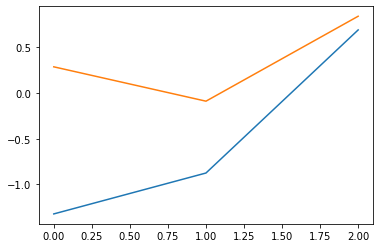

In [19]:
plt.plot(random_1)

In [20]:
random_2 = tf.random.Generator.from_seed(8)
random_2 = random_2.normal(shape=(3,2))

In [21]:
random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.69211644,  0.84215707],
       [-0.06378496,  0.92800784],
       [-0.6039789 , -0.1766927 ]], dtype=float32)>

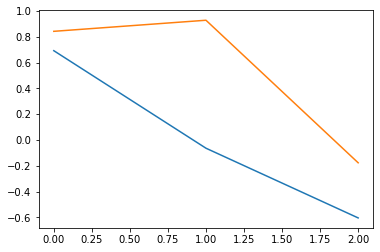

In [22]:
plt.plot(random_2)

In [23]:
random_1 == random_2

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[False, False],
       [False, False],
       [False, False]])>

### Shuffle the order of elements in the order

In [24]:
# Shuffle a tensor
t1 = tf.constant([[10,7], [4,2], [3,5]])

In [25]:
t1

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 4,  2],
       [ 3,  5]])>

In [26]:
t1.ndim

2

In [27]:
tf.random.shuffle(t1)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  5],
       [ 4,  2],
       [10,  7]])>

In [28]:
tf.random.shuffle(t1)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 4,  2],
       [10,  7],
       [ 3,  5]])>

In [29]:
tf.random.shuffle(t1, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  5],
       [ 4,  2],
       [10,  7]])>

In [30]:
tf.random.set_seed(42)
tf.random.shuffle(t1, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 4,  2],
       [ 3,  5]])>

### Tensor with NumPy and some Important stuff

In [31]:
tf.ones([5,5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [32]:
tf.zeros([3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [33]:
tf.eye(3)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [34]:
tf.eye(3, num_columns = 5)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)>

In [35]:
import numpy as np

In [36]:
A = np.arange(1, 25, dtype=np.int32)

In [37]:
A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [38]:
X = tf.constant(A, shape= (2,3,4))

In [39]:
X

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])>

In [40]:
Y = tf.constant(A, shape=(6,4))
Y

<tf.Tensor: shape=(6, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24]])>

In [41]:
Y.ndim, X.ndim

(2, 3)

### Getting informations from tensors
* Shape
* Rank
* Axis or Dimension
* Size

In [42]:
#Creating rank 4 tensor
tensor_rank4 = tf.zeros(shape=[2, 3, 4, 5])

In [43]:
tensor_rank4

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [44]:
tensor_rank4[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [45]:
tensor_rank4.shape

TensorShape([2, 3, 4, 5])

In [46]:
tensor_rank4.ndim

4

In [47]:
tf.size(tensor_rank4)

<tf.Tensor: shape=(), dtype=int32, numpy=120>

### Indexing Tensor

In [48]:
tensor_rank4[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [49]:
rank_tensor2 = tf.constant([[2,5],[3,4]])
rank_tensor2, rank_tensor2.shape, rank_tensor2.ndim

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[2, 5],
        [3, 4]])>,
 TensorShape([2, 2]),
 2)

In [50]:
rank_tensor2[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([5, 4])>

In [51]:
#change the dim
rank_tensor3 = rank_tensor2[..., tf.newaxis]

In [52]:
rank_tensor3

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[2],
        [5]],

       [[3],
        [4]]])>

In [53]:
#Alternative
tf.expand_dims(rank_tensor2, axis=-1)

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[2],
        [5]],

       [[3],
        [4]]])>

In [54]:
tf.expand_dims(rank_tensor2, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[2, 5],
        [3, 4]]])>

In [55]:
tf.expand_dims(rank_tensor2, axis=1)

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[2, 5]],

       [[3, 4]]])>

In [56]:
rank_tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 5],
       [3, 4]])>

### Manipulating Tensors
**Basic Operations**

`+`,`-`,`/`,`*`

**Scalar Operations**

In [57]:
tensor_A = tf.constant([[10, 7], [20,21]])

In [58]:
tensor_A + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [30, 31]])>

In [59]:
tensor_A - 5

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 5,  2],
       [15, 16]])>

In [60]:
tensor_A / 2

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[ 5. ,  3.5],
       [10. , 10.5]])>

In [61]:
tensor_A * 8

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 80,  56],
       [160, 168]])>

In [62]:
tf.multiply(tensor_A, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [200, 210]])>

### Matrix Multiplication

In [63]:
tf.matmul(tensor_A, tensor_A)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[240, 217],
       [620, 581]])>

In [64]:
tensor_A * tensor_A

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [400, 441]])>

In [65]:
tensor_A @ tensor_A

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[240, 217],
       [620, 581]])>

In [66]:
A = tf.constant([[3,4],
                [7,8],
                [9,6]])

In [67]:
B = tf.constant([[9,0],
                [8,8],
                [9,5]])

In [68]:
A * B

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[27,  0],
       [56, 64],
       [81, 30]])>

In [69]:
z = tf.reshape(B, shape=(2,3))

In [70]:
A @ z

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 59,  36,  44],
       [127,  72,  96],
       [129,  54, 102]])>

In [71]:
y = tf.reshape(A, shape=(2,3))

In [72]:
tf.matmul(y, B)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[122,  67],
       [198, 102]])>

In [73]:
tf.transpose(A)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 7, 9],
       [4, 8, 6]])>

In [74]:
tf.reshape(A, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 4, 7],
       [8, 9, 6]])>

In [75]:
tf.matmul(tf.transpose(A), B)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[164, 101],
       [154,  94]])>

In [76]:
tf.matmul(A, tf.transpose(B))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  56,  47],
       [ 63, 120, 103],
       [ 81, 120, 111]])>

### Changing the datatype of tensors

In [77]:
u = tf.constant([1.7, 2.4])

In [78]:
u.dtype

tf.float32

In [79]:
o = tf.cast(u, dtype=tf.float16)
o, o.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 2.4], dtype=float16)>,
 tf.float16)

In [80]:
v = tf.constant([7,8])

In [81]:
v.dtype

tf.int32

In [82]:
i = tf.cast(v, dtype=tf.float16)
i, i.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([7., 8.], dtype=float16)>,
 tf.float16)

### Aggregrating

In [83]:
D = tf.constant([-7,-10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10])>

In [84]:
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10])>

In [87]:
E = tf.constant(np.random.randint(0,100, size=50))

In [88]:
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 8, 50,  0, 78, 38, 72, 91, 67, 19, 96, 76, 25, 25, 52, 60, 58,  7,
       44, 65, 79, 64, 60, 38,  5, 97, 38, 36, 51, 78, 86, 42, 97, 92, 46,
        5, 79, 99, 45, 17, 78, 34, 18, 83, 41, 88, 10, 67, 94, 54, 76])>

In [89]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [90]:
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [91]:
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int32, numpy=99>

In [92]:
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int32, numpy=54>

In [93]:
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int32, numpy=2728>

In [98]:
E = tf.cast(E, dtype=tf.float32)
tf.math.reduce_std(E)

<tf.Tensor: shape=(), dtype=float32, numpy=28.793165>

In [99]:
E = tf.cast(E, dtype=tf.float32)
tf.math.reduce_variance(E)

<tf.Tensor: shape=(), dtype=float32, numpy=829.0464>

### Find Positional Maximum and Minimum

In [100]:
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [104]:
index_f_max = tf.argmax(F)
index_f_max

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [105]:
F[index_f_max]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [106]:
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [108]:
F[index_f_max] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [109]:
index_f_min = tf.argmin(F)
index_f_min

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [110]:
F[index_f_min]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing a tensor

In [112]:
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.68789124, 0.48447883, 0.9309944 , 0.252187  , 0.73115396,
           0.89256823, 0.94674826, 0.7493341 , 0.34925628, 0.54718256,
           0.26160395, 0.69734323, 0.11962581, 0.53484344, 0.7148968 ,
           0.87501776, 0.33967495, 0.17377627, 0.4418521 , 0.9008261 ,
           0.13803864, 0.12217975, 0.5754491 , 0.9417181 , 0.9186585 ,
           0.59708476, 0.6109482 , 0.82086265, 0.83269787, 0.8915849 ,
           0.01377225, 0.49807465, 0.57503664, 0.6856195 , 0.75972784,
           0.908944  , 0.40900218, 0.8765154 , 0.53890026, 0.42733097,
           0.401173  , 0.66623247, 0.16348064, 0.18220246, 0.97040176,
           0.06139731, 0.53034747, 0.9869994 , 0.4746945 , 0.8646754 ]]]]],
      dtype=float32)>

In [113]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [114]:
G_squeezed = tf.squeeze(G)
G_squeezed

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.68789124, 0.48447883, 0.9309944 , 0.252187  , 0.73115396,
       0.89256823, 0.94674826, 0.7493341 , 0.34925628, 0.54718256,
       0.26160395, 0.69734323, 0.11962581, 0.53484344, 0.7148968 ,
       0.87501776, 0.33967495, 0.17377627, 0.4418521 , 0.9008261 ,
       0.13803864, 0.12217975, 0.5754491 , 0.9417181 , 0.9186585 ,
       0.59708476, 0.6109482 , 0.82086265, 0.83269787, 0.8915849 ,
       0.01377225, 0.49807465, 0.57503664, 0.6856195 , 0.75972784,
       0.908944  , 0.40900218, 0.8765154 , 0.53890026, 0.42733097,
       0.401173  , 0.66623247, 0.16348064, 0.18220246, 0.97040176,
       0.06139731, 0.53034747, 0.9869994 , 0.4746945 , 0.8646754 ],
      dtype=float32)>

In [115]:
G_squeezed.shape

TensorShape([50])

In [116]:
some_list = [0,1,2,3]
some_list

[0, 1, 2, 3]

In [118]:
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [119]:
tf.one_hot(some_list, depth=4, on_value="hello", off_value="bye")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'hello', b'bye', b'bye', b'bye'],
       [b'bye', b'hello', b'bye', b'bye'],
       [b'bye', b'bye', b'hello', b'bye'],
       [b'bye', b'bye', b'bye', b'hello']], dtype=object)>